# Basic ML Libraries

In [208]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
import copy

# Dataset

In [209]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()

In [210]:
data, labels = digits.data, digits.target

In [211]:
print(data.shape, labels.shape)

(1797, 64) (1797,)


In [212]:
df = pd.DataFrame(labels, columns = ['class'])
x = list(df['class'].unique())
y = list(df['class'].value_counts())

In [213]:
x_train, x_val, y_train, y_val = train_test_split(data, labels, stratify = labels, random_state = 0, test_size = 0.3)
print(x_train.shape, y_train.shape)

(1257, 64) (1257,)


# Model

In [214]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn import tree

## Criterion (Entropy)

In [215]:
loss = []
accuracy = []
best_depth, best_model, best_accuracy = None, None, 0

for depth in range(1, 20):
    model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = depth, max_features = None)
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_val)

    if best_accuracy < accuracy_score(y_pred, y_val):
        best_depth = depth
        best_model = copy.deepcopy(model)
        best_accuracy = accuracy_score(y_pred, y_val)
        
    loss.append(mean_squared_error(y_pred, y_val))
    accuracy.append(accuracy_score(y_pred, y_val))

In [216]:
print(f"Depth = {best_depth}, Min Loss = {round(min(loss), 2)}, Max Accuracy = {round(max(accuracy), 2) * 100}%")

Depth = 10, Min Loss = 2.23, Max Accuracy = 86.0%


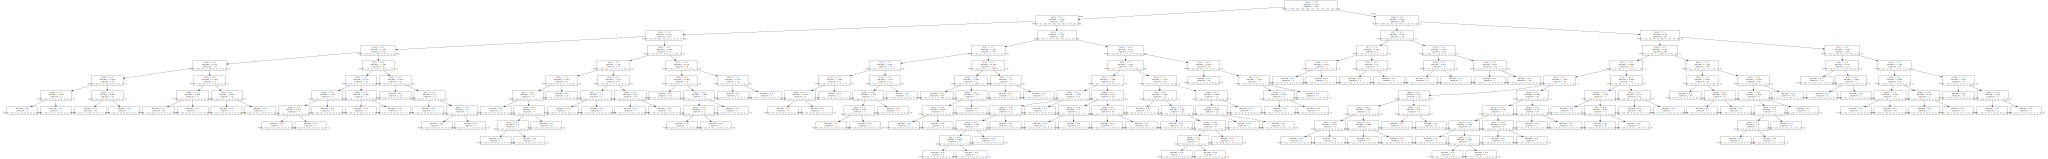

In [217]:
import graphviz 
dot_data = tree.export_graphviz(best_model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("digits")
graph

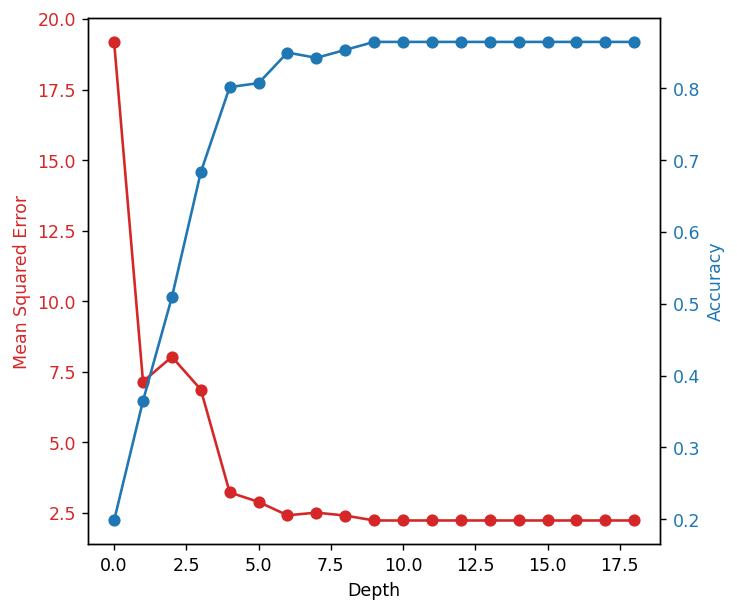

In [218]:
#plt.figure(figsize = (6, 5), dpi = 125)
fig, ax1 = plt.subplots(figsize = (6, 5), dpi = 125)
color = "tab:red"
ax1.set_xlabel("Depth")
ax1.set_ylabel("Mean Squared Error", color = color)
ax1.plot(loss, '-o', color = color)
ax1.tick_params(axis = 'y', labelcolor = color)
ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel("Accuracy", color = color)
ax2.plot(accuracy, '-o', color = color)
ax2.tick_params(axis = 'y', labelcolor = color)
fig.tight_layout()
plt.show()

# Criterion (Gini)

In [219]:
loss = []
accuracy = []
best_depth, best_model, best_accuracy = None, None, 0

for depth in range(1, 20):
    model = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = depth, max_features = None)
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_val)

    if best_accuracy < accuracy_score(y_pred, y_val):
        best_depth = depth
        best_model = copy.deepcopy(model)
        best_accuracy = accuracy_score(y_pred, y_val)
        
    loss.append(mean_squared_error(y_pred, y_val))
    accuracy.append(accuracy_score(y_pred, y_val))

In [220]:
print(f"Depth = {best_depth}, Min Loss = {round(min(loss), 2)}, Max Accuracy = {round(max(accuracy), 2) * 100}%")

Depth = 10, Min Loss = 2.81, Max Accuracy = 85.0%


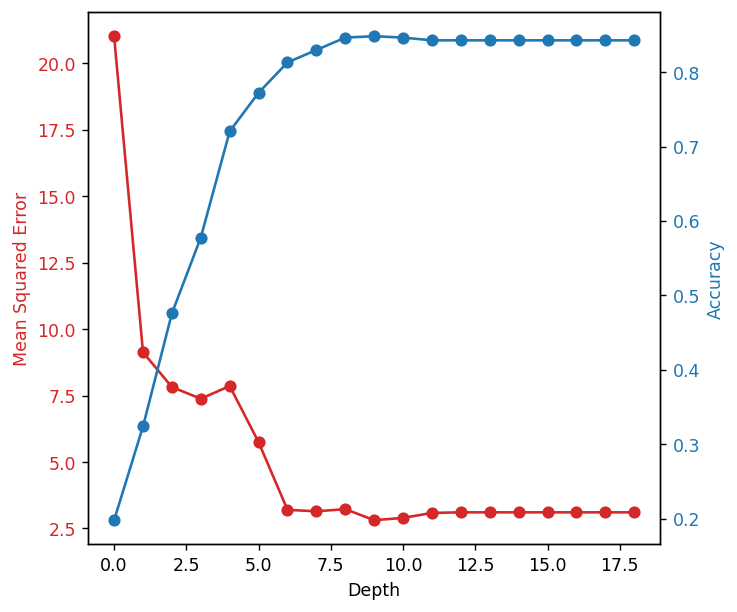

In [221]:
#plt.figure(figsize = (6, 5), dpi = 125)
fig, ax1 = plt.subplots(figsize = (6, 5), dpi = 125)
color = "tab:red"
ax1.set_xlabel("Depth")
ax1.set_ylabel("Mean Squared Error", color = color)
ax1.plot(loss, '-o', color = color)
ax1.tick_params(axis = 'y', labelcolor = color)
ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel("Accuracy", color = color)
ax2.plot(accuracy, '-o', color = color)
ax2.tick_params(axis = 'y', labelcolor = color)
fig.tight_layout()
plt.show()

# Final Model

In [223]:
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 10, max_features = None)
model = model.fit(x_train, y_train)
y_pred_val = model.predict(x_val)
y_pred_train = model.predict(x_train)

## Accuracy Score

In [225]:
v_acc = accuracy_score(y_pred_val, y_val)
t_acc = accuracy_score(y_pred_train, y_train)

print(f"Train Accuracy = {t_acc * 100}%, Validaton Accuracy = {v_acc * 100}%")

Train Accuracy = 100.0%, Validaton Accuracy = 86.48148148148148%


## Precision

In [233]:
from sklearn.metrics import precision_score

v_pre = precision_score(y_pred_val, y_val, average = 'weighted')
t_pre = precision_score(y_pred_train, y_train, average = 'weighted')

print(f"Train [Precision] = {t_pre}, Validaton [Precision] = {v_pre}")

Train [Precision] = 1.0, Validaton [Precision] = 0.8646998040394267


## Recall

In [234]:
from sklearn.metrics import recall_score

v_rec = recall_score(y_pred_val, y_val, average = 'weighted')
t_rec = recall_score(y_pred_train, y_train, average = 'weighted')

print(f"Train [Recall] = {t_rec}, Validaton [Recall] = {v_rec}")

Train [Recall] = 1.0, Validaton [Recall] = 0.8648148148148148


## F1-Score

In [235]:
from sklearn.metrics import f1_score

v_f = f1_score(y_pred_val, y_val, average = 'weighted')
t_f = f1_score(y_pred_train, y_train, average = 'weighted')

print(f"Train [F1 Score] = {t_f}, Validaton [F1 Score] = {v_f}")

Train [F1 Score] = 1.0, Validaton [F1 Score] = 0.863796463299307
